<a href="https://colab.research.google.com/github/AstrophyJimmy/Random_Walk_Simulation_in_1D_3D/blob/main/Random_Walk_Simulation_in_3D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# $$\mathcal{Random \;Walk \; Simulation \; in \;} 3 \mathcal{D}$$


In [ ]:
import random as r
import numpy as np
from numpy import pi, sin, cos, arcsin
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D
from tqdm.notebook import tqdm

# Algorithm of Each Random Walker
At each scattering step, the photon is scattered isotropically. This means the probability is the same for being scattered into any direction $(x, y, z)$. In spherical coordinates, this transforms to equal probability of scattering into directions given by $\sin \theta$ and $\phi$. So randomly draw values of $\sin \theta$ and $\phi$ at each step:

let randT be a random number generated between 0 and pi

and randP be a random number generated between 0 and 2*pi

>> I did not use the provided suggestion in the homework as it had used the same random number for $\phi$ and $\theta$ as if there is dependence between them also it did not yield a uniform random distribution

$$\theta = randT$$
$$\phi = randP$$
Then propagate the photon a length $\lambda$ into direction $(\theta,\phi)$ from its current location
$(x, y, z)$. Recall
$$dx = \lambda \sin \theta \cos \phi$$
$$dy = \lambda \sin \theta \sin \phi$$
$$dz = \lambda \cos \theta$$

Update to new position $(x + dx, y + dy, z + dy)$ and compute the new radial location $R$.

Iterate until $R ≥ d$ and record how many steps it takes. Finally compute the average numberof steps Nout based on all photons

# For One Walker(Photon)

In [ ]:
randGen = r.randint(0,1e10) # I am using a random generator to generate the seeders value
r.seed(randGen)
d = 1
Lambda = 0.001
x = 0
y = 0
z = 0
NOut = 0 #Step Counter
R = 0
while (R<=d):
  Theta = r.uniform(0,pi)
  phi = r.uniform(0,2*pi)
  x += Lambda * sin(Theta) * cos(phi)
  y += Lambda * sin(Theta) * sin(phi)
  z += Lambda * cos(Theta)
  R = np.sqrt(np.power(x,2) + np.power(y,2) + np.power(z,2))
  NOut += 1
print('The photon reached a radial direction of ', R)
print('After Number of steps = ', NOut)

The photon reached a radial direction of  1.000081488832647
After Number of steps =  1608833


#For a Large Number of Photons


The average NOut is  1085951.22


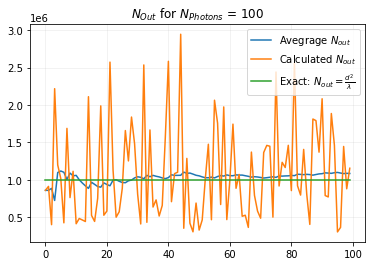

In [ ]:
NPhotons = int(100)
NOuts = np.zeros(NPhotons)
AvgNOuts = np.zeros(NPhotons)
XOuts = np.zeros(NPhotons)
YOuts = np.zeros(NPhotons)
ZOuts = np.zeros(NPhotons)
for i in tqdm(range(NPhotons)):
  randGen = r.randint(0,1e10) # I am using a random generator to generate the seeders value
  r.seed(randGen)
  d = 1
  Lambda = 0.001
  x = 0
  y = 0
  z = 0
  NOut = 0 #Step Counter
  R = 0
  while (R<=d):
    Theta = r.uniform(0,pi)
    phi = r.uniform(0,2*pi)
    x += Lambda * sin(Theta) * cos(phi)
    y += Lambda * sin(Theta) * sin(phi)
    z += Lambda * cos(Theta)
    R = np.sqrt(np.power(x,2) + np.power(y,2) + np.power(z,2))
    NOut += 1
  NOuts[i] = NOut
  AvgNOuts[i] = np.mean(NOuts[:i]) if i else NOut
  XOuts[i] = x
  YOuts[i] = y
  ZOuts[i] = z


print("The average NOut is ", np.mean(NOuts))
plt.title(r'$N_{Out}$ for $N_{Photons}$ = ' + str(NPhotons))
plt.plot(AvgNOuts, label=r'Avegrage $N_{out}$')
plt.plot(NOuts, label = r'Calculated $N_{out}$')
plt.plot(list(range(NPhotons)), [d**2/Lambda**2]*NPhotons, label=r'Exact: $N_{out} = \frac{d^2}{\lambda}$')
plt.legend()
plt.grid(alpha=0.2)
plt.show()

# Plotting the heads of each walker
### The Final Location of each photon as it gets out

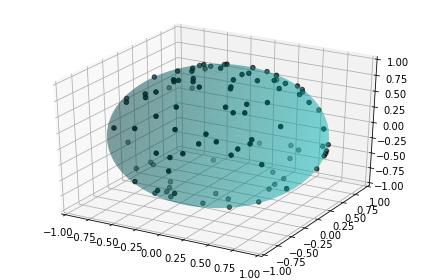

In [ ]:
# Create a sphere
R = 1
pi = np.pi
cos = np.cos
sin = np.sin
phi, theta = np.mgrid[0.0:pi:100j, 0.0:2.0*pi:100j]
x = R*sin(phi)*cos(theta)
y = R*sin(phi)*sin(theta)
z = R*cos(phi)


#Set colours and render
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(
    x, y, z,  rstride=1, cstride=1, color='c', alpha=0.3, linewidth=0)

ax.scatter(XOuts, YOuts, ZOuts,color="k",s=20)
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.set_zlim([-1,1])
plt.tight_layout()
plt.show()


>>> Noting this plot doesn't look like a perfect sphere because of the aspect ratio of the plot

# Checking Dependencies

In [ ]:
#A function representing a set of random walkers to exploit dependences
def RandomWalker3D(NewLambda, NewD):
  NPhotons = 10
  NOuts = np.zeros(NPhotons)
  for i in tqdm(range(NPhotons)):
    randGen = r.randint(0,1e10) # I am using a random generator to generate the seeders value
    r.seed(randGen)
    x = 0
    y = 0
    z = 0
    NOut = 0 #Step Counter
    R = 0
    while (R<=NewD):
      Theta = r.uniform(0,pi)
      phi = r.uniform(0,2*pi)
      x += NewLambda * sin(Theta) * cos(phi)
      y += NewLambda * sin(Theta) * sin(phi)
      z += NewLambda * cos(Theta)
      R = np.sqrt(np.power(x,2) + np.power(y,2) + np.power(z,2))
      NOut += 1
    NOuts[i] = NOut
  return np.mean(NOuts)

# Now we check the dependence of $d$ on $N_{out}$ at fixed $\lambda=0.001$ for 10 photons each time.

d =  0.25



d =  0.5



d =  0.75



d =  1.0



d =  1.25



d =  1.5


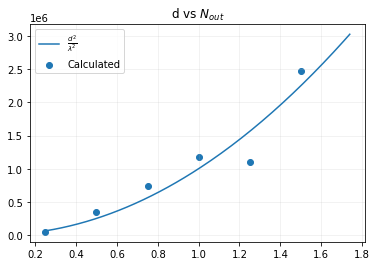

In [ ]:
ds = np.arange(0.25,1.75,0.25)
Lambda = 0.001
NOutAvg = np.zeros_like(ds)
for i in tqdm(range(len(ds))):
  d = ds[i]
  print('d = ',d)
  NOutAvg[i]=RandomWalker3D(Lambda, d)
plt.title(r'd vs $N_{out}$')
plt.scatter(ds, NOutAvg, label='Calculated')
plt.plot(np.arange(0.25,1.75,0.01), np.power(np.arange(0.25,1.75,0.01),2)/np.power(Lambda,2), label = r'$\frac{d^2}{\lambda^2}$')
plt.legend()
plt.grid(alpha=0.2)
plt.show()

# Now we check the dependence of $\lambda$ of $N_{out}$ at fixed $d=1$ for 10 photons each time.

lambda =  0.001



lambda =  0.002



lambda =  0.003



lambda =  0.004



lambda =  0.005


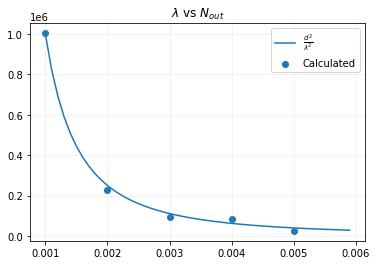

In [ ]:
Lambdas = np.arange(0.001,0.006,0.001)
d = 1
NOutAvg = np.zeros_like(Lambdas)
for i in tqdm(range(len(Lambdas))):
  Lambda = Lambdas[i]
  print('lambda = ',Lambda)
  NOutAvg[i]=RandomWalker3D(Lambda, d)
plt.title(r'$\lambda$ vs $N_{out}$')
plt.scatter(Lambdas, NOutAvg, label='Calculated')
plt.plot(np.arange(0.001,0.006,0.0001), np.power(d,2)/np.power(np.arange(0.001,0.006,0.0001),2), label = r'$\frac{d^2}{\lambda^2}$')
plt.legend()
plt.grid(alpha=0.2)
plt.show()

>> There is similarity between the 1D case and 3D because of the isotropy of the space from the prespective of the walker/photon as it is always in positive or negative directions towards existing the 